<a href="https://colab.research.google.com/github/xaldoxxx/curiosidades/blob/main/catoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
# para usar Google Colab
from google.colab.patches import cv2_imshow
from google.colab import files

In [ ]:
def read_file(filename):
    img = cv2.imread(filename)
    cv2_imshow(img)
    return img

In [3]:
uploaded = files.upload()

Saving mi_foto.jpg to mi_foto.jpg


In [4]:
filename = next(iter(uploaded))

In [ ]:
img = read_file(filename)

In [7]:
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

In [8]:
line_size = 7
blur_value = 7


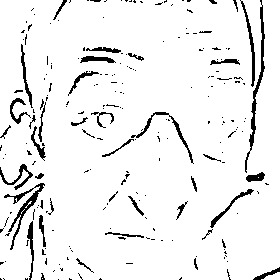

In [9]:
edges = edge_mask(img, line_size, blur_value)
cv2_imshow(edges)

In [16]:
def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

In [25]:
total_color = 2
img = color_quantization(img, total_color)

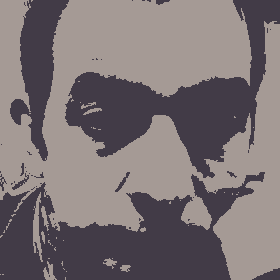

In [26]:
cv2_imshow(img)

In [27]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)

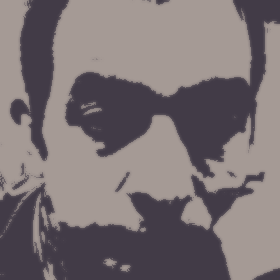

In [30]:
cv2_imshow(blurred)

In [29]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)